In [ ]:
!pip uninstall scikit-learn


Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.2.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? n


In [ ]:
pip install scikit-learn==1.1.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 49.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.10.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.


In [ ]:
pip show scikit-learn

Name: scikit-learn
Version: 1.1.3
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

In [ ]:
data = pd.read_csv('/content/movie_metadata.csv')

In [ ]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [ ]:
data.count()

color                        5024
director_name                4939
num_critic_for_reviews       4993
duration                     5028
director_facebook_likes      4939
actor_3_facebook_likes       5020
actor_2_name                 5030
actor_1_facebook_likes       5036
gross                        4159
genres                       5043
actor_1_name                 5036
movie_title                  5043
num_voted_users              5043
cast_total_facebook_likes    5043
actor_3_name                 5020
facenumber_in_poster         5030
plot_keywords                4890
movie_imdb_link              5043
num_user_for_reviews         5022
language                     5031
country                      5038
content_rating               4740
budget                       4551
title_year                   4935
actor_2_facebook_likes       5030
imdb_score                   5043
aspect_ratio                 4714
movie_facebook_likes         5043
dtype: int64

In [ ]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [ ]:
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [ ]:
data.describe(include='object')

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,5024,4939,5030,5043,5036,5043,5020,4890,5043,5031,5038,4740
unique,2,2398,3032,914,2097,4917,3521,4760,4919,47,65,18
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,Ben-Hur,John Heard,based on novel,http://www.imdb.com/title/tt0232500/?ref_=fn_t...,English,USA,R
freq,4815,26,20,236,49,3,8,4,3,4704,3807,2118


In [ ]:
bins = [ 1, 3, 6, 10]
labels = ['FLOP', 'AVG', 'HIT']
data['imdb_binned'] = pd.cut(data['imdb_score'], bins=bins, labels=labels)

Text(0.5, 1.0, 'Categorization of Movies')

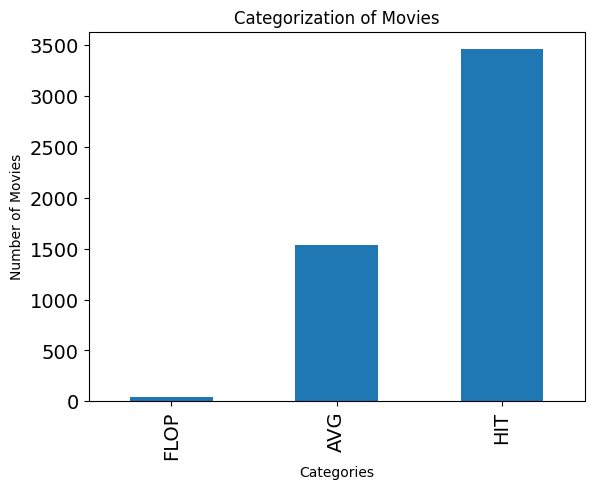

In [ ]:
data.groupby(['imdb_binned']).size().plot(kind="bar",fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Number of Movies')
plt.title('Categorization of Movies')

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.describe(include='object')

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,3756,3756,3756,3756,3756,3756,3756,3756,3756,3756,3756,3756
unique,2,1659,2188,745,1428,3655,2587,3656,3656,34,45,12
top,Color,Steven Spielberg,Morgan Freeman,Comedy|Drama|Romance,Robert De Niro,Home,Steve Coogan,alien friendship|alien invasion|australia|flyi...,http://www.imdb.com/title/tt2224026/?ref_=fn_t...,English,USA,R
freq,3632,25,20,147,42,3,8,3,3,3598,2987,1700


In [ ]:
data.drop(columns=['movie_title','movie_imdb_link'],inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_list=['color', 'director_name', 'actor_2_name',
        'genres', 'actor_1_name',
        'actor_3_name',
        'plot_keywords',
        'language', 'country', 'content_rating',
       'title_year', 'aspect_ratio']
data[cat_list]=data[cat_list].apply(lambda x:le.fit_transform(x))

<ipython-input-18-b81499084cfc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

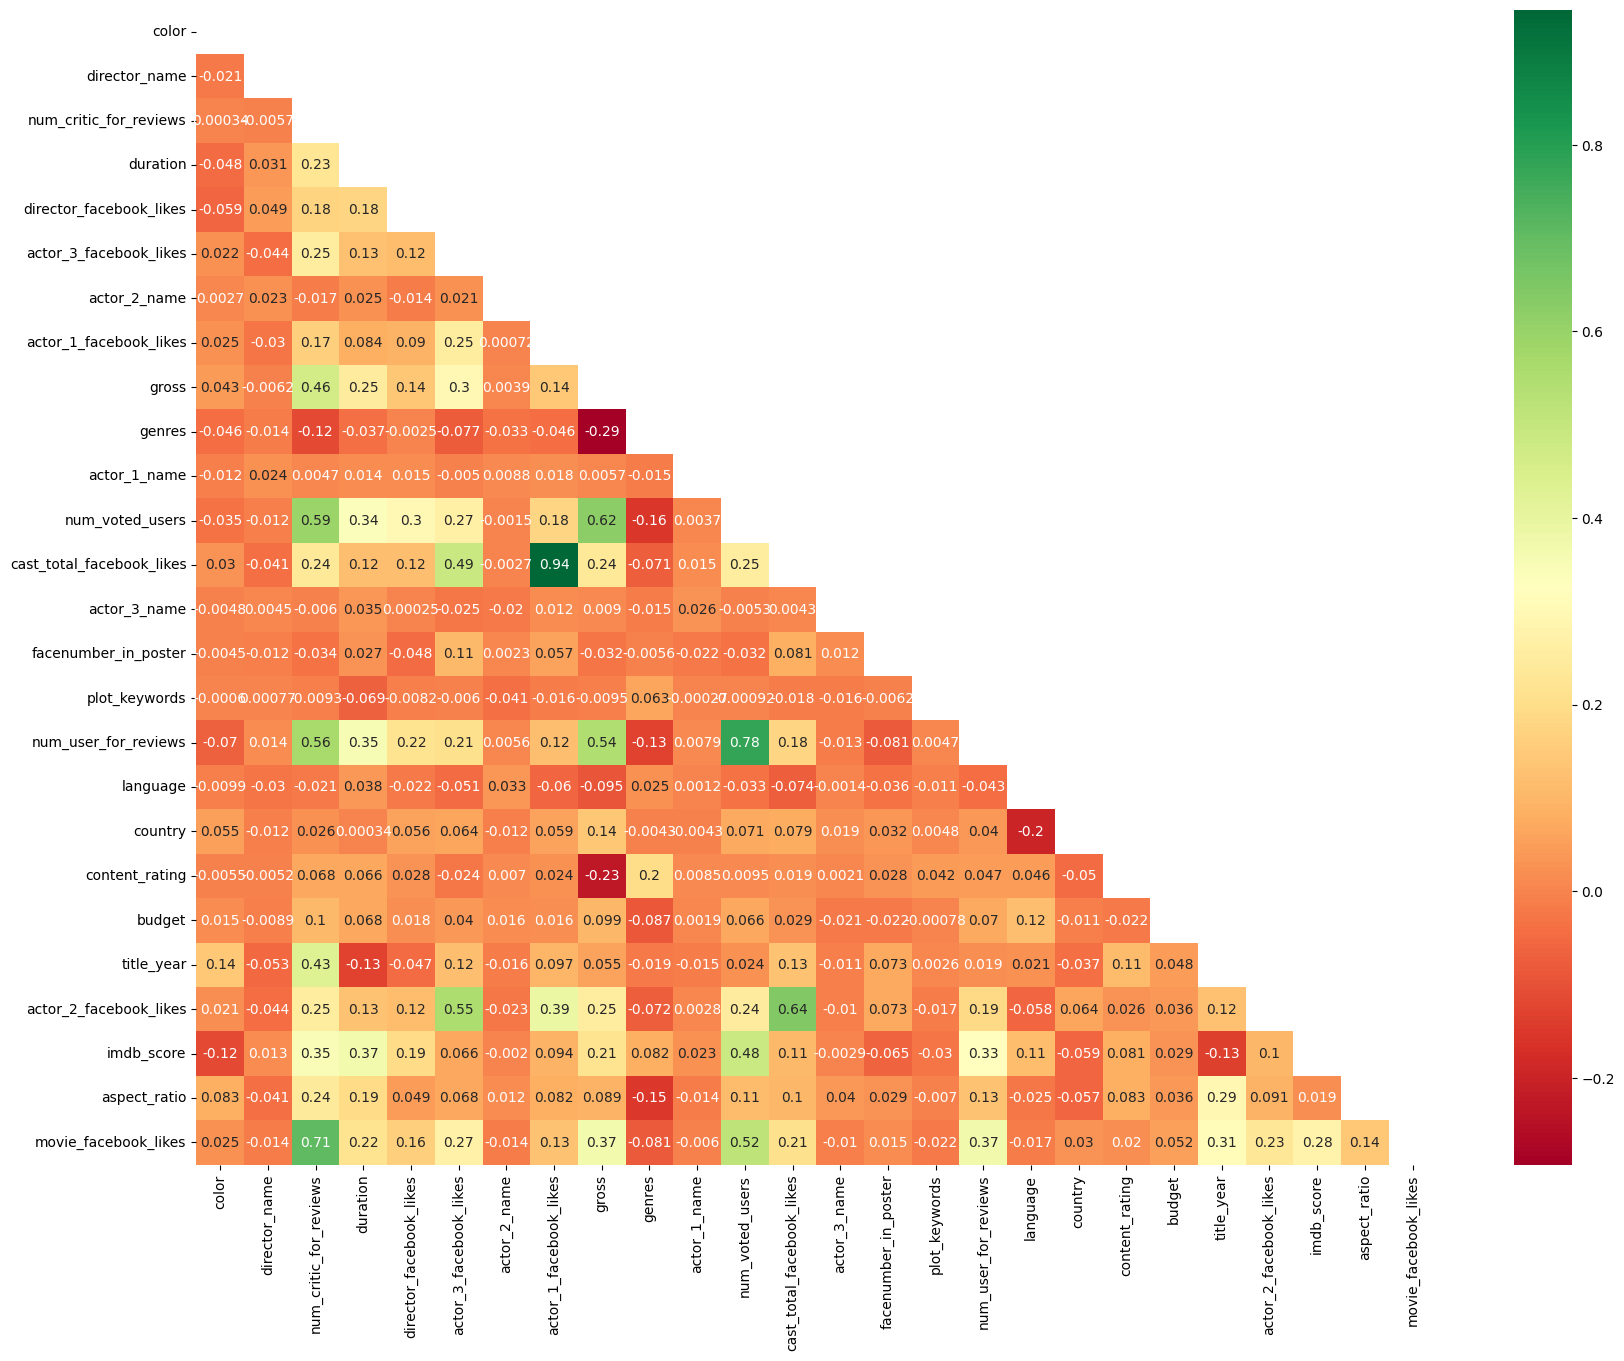

In [ ]:
corr = data.corr()
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plt.subplots(figsize=(20,15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='RdYlGn',annot=True,mask = mask)

In [ ]:
data.drop(columns=['cast_total_facebook_likes','num_critic_for_reviews'],inplace=True)

In [ ]:
data.drop(columns=['imdb_score'],inplace=True)

In [ ]:
data.shape

(3756, 24)

In [ ]:
X = data.iloc[:, 0:23].values
#Dependent/Target Variable
y = data.iloc[:, 23].values
y

['HIT', 'HIT', 'HIT', 'HIT', 'HIT', ..., 'HIT', 'HIT', 'HIT', 'HIT', 'HIT']
Length: 3756
Categories (3, object): ['FLOP' < 'AVG' < 'HIT']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0,stratify = y)
print(X_train.shape)
print(y_train.shape)

(3004, 23)
(3004,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
clf_rf=RandomForestClassifier(random_state=0)
rfecv=RFECV(estimator=clf_rf, step=1,cv=5,scoring='neg_log_loss')
rfecv=rfecv.fit(X_train,y_train)

In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 7
Best features : Int64Index([2, 4, 7, 8, 10, 14, 18], dtype='int64')


In [ ]:
clf_rf = clf_rf.fit(X_train,y_train)
importances = clf_rf.feature_importances_

std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


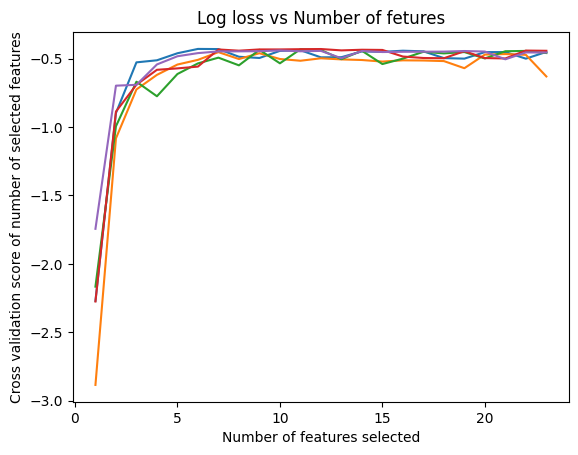

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.title("Log loss vs Number of fetures")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
X_opt = X_train.iloc[:,X_train.columns[rfecv.support_]]
X_test = X_test.iloc[:,X_test.columns[rfecv.support_]]

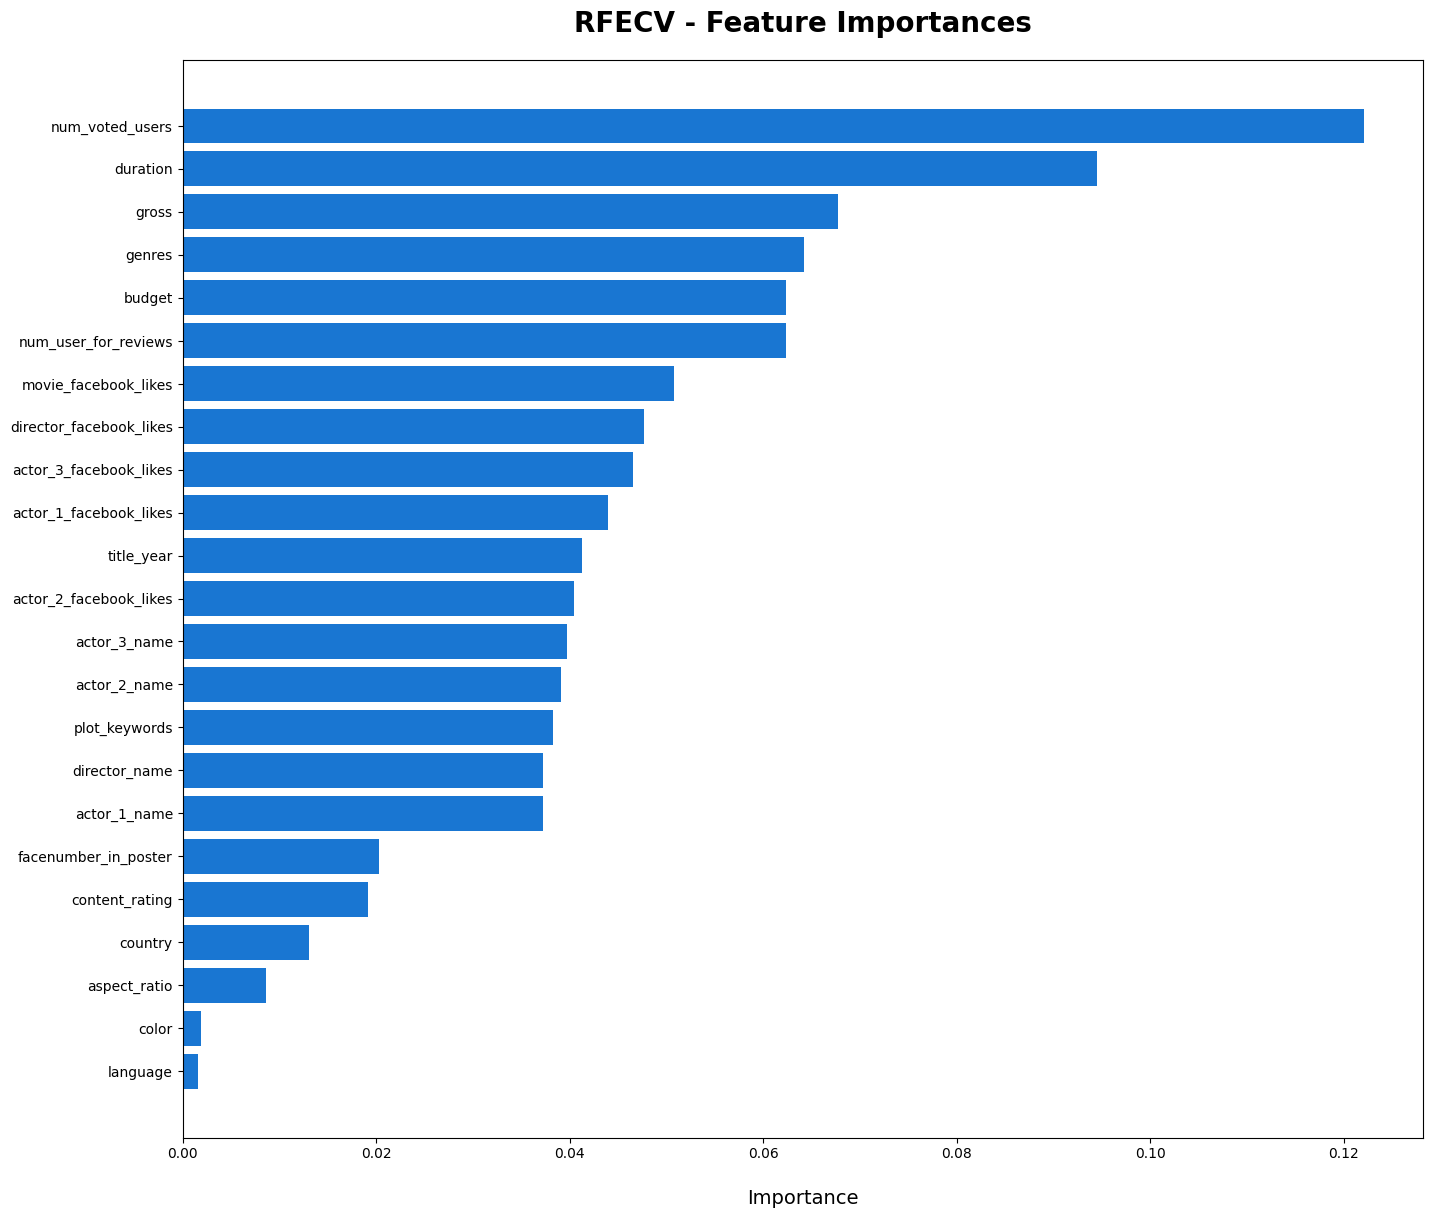

In [ ]:
dset = pd.DataFrame()
data1 = data
data1.drop(columns=['imdb_binned'],inplace=True)
dset['attr'] = data1.columns

dset['importance'] = clf_rf.feature_importances_
#Sorting with importance column
dset = dset.sort_values(by='importance', ascending=True)

#Barplot indicating Feature Importance
plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [ ]:
#Training the Random Forest Classifer on Train data
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_opt, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         AVG       0.69      0.62      0.65       224
        FLOP       0.00      0.00      0.00         5
         HIT       0.84      0.89      0.86       523

    accuracy                           0.80       752
   macro avg       0.51      0.50      0.51       752
weighted avg       0.79      0.80      0.80       752



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[139,   0,  85],
       [  4,   0,   1],
       [ 59,   0, 464]])

In [ ]:
macro_avg = 0.85  # Replace with your macro average value
accuracy = 0.90   # Replace with your accuracy value
weighted_avg = 0.88  # Replace with your weighted average value


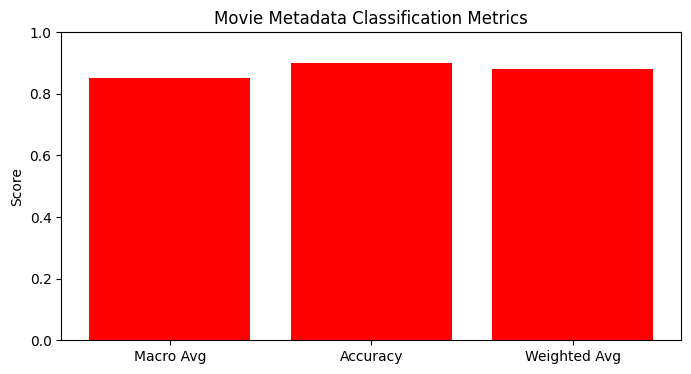

In [ ]:
import matplotlib.pyplot as plt

# Labels for the metrics
labels = ['Macro Avg', 'Accuracy', 'Weighted Avg']

# Values for the metrics
values = [macro_avg, accuracy, weighted_avg]

# Create a bar chart
plt.figure(figsize=(8, 4))
plt.bar(labels,values, color='red')


plt.ylabel('Score')
plt.title('Movie Metadata Classification Metrics')
plt.ylim(0, 1)  # Set the y-axis limit between 0 and 1 for scores
plt.show()
